### The Only Free Lunch in Finance
- The combination of two or more assets that are decorrelated can decrease the volatility in the extended level.

##### 2 - Assets Combinations
- Risk-Return Space or Mean-Variance Framework
    - on `x-axis`: Risk/Variance
    - on `y-axis`: Return of that asset
- What is the return and volatility of a combination of A and B?
    - A portfolio that is 100% in A and 0% in B?
        - the same as the Risk and Return of A
    - A portfolio that is 100% in B and 0% in A?
        - the same as the RIsk and Return of B?
    - 50% in A and 50% in B
        - Return:
            - The weighted mean of all the components of the portfolio.
        - Risk
            - Cannot be answered with just the return and volatility value of each asset.
            - Actually depending on the correlation between A And B.
            - If two assets are not correlated, i.e., A goes up, while B goes down and so on -> volatility will be less than just the weighted average of the volatility of two assets.
            - The more decorrelated they are, the less the volatility of that portfolio.

### Return
$$ R(w_A, w_B) = W_A \times R_A + W_B \times R_B $$

### Volatility
$$ {\sigma}^2(w_A, w_B) = \sigma_A^2 w_A^2 + \sigma_B^2 w_B^2 + 2w_Aw_B\sigma_A\sigma_B\rho_{A, B} $$

- Where $ \rho_{A, B} $ is the correlation between asset A and B.

### The Efficient Frontier
How to compute the efficient frontier when we have a set of expected returns, volatilities (or variance) and correlations (or covariance). It is a fair question as to how we can get these numbers for the future, but for now, we assume that historic returns are a reasonable assumption.

In [2]:
import pandas as pd
ind = pd.read_csv("data/ind30_m_vw_rets.csv", header=0, index_col=0, parse_dates=True)/100
ind.index = pd.to_datetime(ind.index, format="%Y%m").to_period('M')

/tmp/ipykernel_1397/205007867.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  ind = pd.read_csv("data/ind30_m_vw_rets.csv", header=0, index_col=0, parse_dates=True)/100


In [3]:
ind.head()

,Food,Beer,Smoke,Games,Books,Hshld,Clths,Hlth,Chems,Txtls,...,Telcm,Servs,BusEq,Paper,Trans,Whlsl,Rtail,Meals,Fin,Other
1926-07,0.0056,-0.0519,0.0129,0.0293,0.1097,-0.0048,0.0808,0.0177,0.0814,0.0039,...,0.0083,0.0922,0.0206,0.0770,0.0193,-0.2379,0.0007,0.0187,0.0037,0.0520
1926-08,0.0259,0.2703,0.0650,0.0055,0.1001,-0.0358,-0.0251,0.0425,0.0550,0.0814,...,0.0217,0.0202,0.0439,-0.0238,0.0488,0.0539,-0.0075,-0.0013,0.0446,0.0676
1926-09,0.0116,0.0402,0.0126,0.0658,-0.0099,0.0073,-0.0051,0.0069,0.0533,0.0231,...,0.0241,0.0225,0.0019,-0.0554,0.0005,-0.0787,0.0025,-0.0056,-0.0123,-0.0386
1926-10,-0.0306,-0.0331,0.0106,-0.0476,0.0947,-0.0468,0.0012,-0.0057,-0.0476,0.0100,...,-0.0011,-0.0200,-0.0109,-0.0508,-0.0264,-0.1538,-0.0220,-0.0411,-0.0516,-0.0849
1926-11,0.0635,0.0729,0.0455,0.0166,-0.0580,-0.0054,0.0187,0.0542,0.0520,0.0311,...,0.0163,0.0377,0.0364,0.0384,0.0160,0.0467,0.0652,0.0433,0.0224,0.0400


In [4]:
ind.columns
# We can observe that column value has embedded spaces.
# We can strip out the leading and trailing spaces in the Series by using `.str.strip` method.

Index(['Food ', 'Beer ', 'Smoke', 'Games', 'Books', 'Hshld', 'Clths', 'Hlth ',
       'Chems', 'Txtls', 'Cnstr', 'Steel', 'FabPr', 'ElcEq', 'Autos', 'Carry',
       'Mines', 'Coal ', 'Oil  ', 'Util ', 'Telcm', 'Servs', 'BusEq', 'Paper',
       'Trans', 'Whlsl', 'Rtail', 'Meals', 'Fin  ', 'Other'],
      dtype='object')

In [5]:
# since the column names have embedded spaces, we can strip out the leading and trailing spaces
# in the Series by using the .str.strip() method.
ind.columns = ind.columns.str.strip();
ind.columns

Index(['Food', 'Beer', 'Smoke', 'Games', 'Books', 'Hshld', 'Clths', 'Hlth',
       'Chems', 'Txtls', 'Cnstr', 'Steel', 'FabPr', 'ElcEq', 'Autos', 'Carry',
       'Mines', 'Coal', 'Oil', 'Util', 'Telcm', 'Servs', 'BusEq', 'Paper',
       'Trans', 'Whlsl', 'Rtail', 'Meals', 'Fin', 'Other'],
      dtype='object')

In [6]:
ind.shape
# 1110 rows and 30 columns

(1110, 30)

In [7]:
def get_ind_returns():
    """
    Load and format the Ken French 30 Industry Portfolios Value Weighted Monthly Returns
    """
    ind = pd.read_csv("data/ind30_m_vw_rets.csv", header=0, index_col=0, parse_dates=True)/100
    ind.index = pd.to_datetime(ind.index, format="%Y%m").to_period('M')
    ind.columns = ind.columns.str.strip()
    return ind

In [8]:
import portfolio_management_lib as port

%load_ext autoreload
%autoreload 2
%matplotlib inline

ind = port.get_ind_returns()
ind.shape

/home/joe/Study/portfolio_management/lib/portfolio_management_lib.py:210: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  ind = pd.read_csv("data/ind30_m_vw_rets.csv", header=0, index_col=0, parse_dates=True)/100


(1110, 30)

<Axes: >

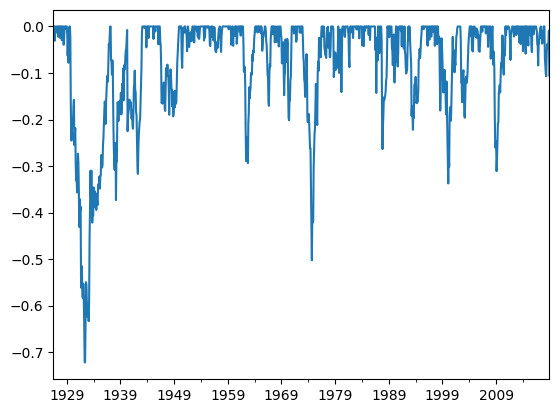

In [9]:
# check the drawdown of the Food industry
    # drawdown: The decline in value of a single investment or an investment portfolio from a
    # relative peak value to a relative trough.
port.drawdown(ind["Food"])["Drawdown"].plot.line()

In [10]:
port.var_gaussian(ind[["Food", "Beer", "Smoke"]], modified = True)

Food     0.061207
Beer     0.033881
Smoke    0.080292
dtype: float64

<Axes: >

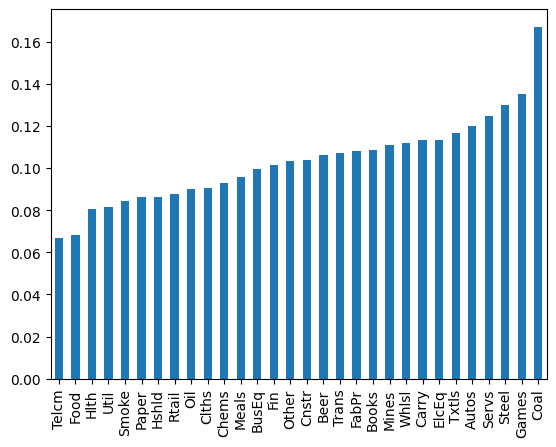

In [11]:
port.var_gaussian(ind).sort_values().plot.bar()

Let's use this as an opportunity to write functions for annualized returns, volatility and sharpe ratios.

In [12]:
'''
periods_per_year is the number of entries per year.
e.g., if the data is monthly-basis, the value is 12.
if the data is daily-basis, it should be around 255, the average number of working days per year, i.e., the number of days
the USA stock market is open.
'''

def annualize_rets(r, periods_per_year):
    """
    Annualizes a set of returns
    We should infer the period per year
    """
    compounded_growth = (1 + r).prod() # prod(): return the product of the values over the requested axis.
    n_periods = r.shape[0]
    return compounded_growth ** (periods_per_year/n_periods) - 1

def annualize_vol(r, periods_per_year):
    """
    Annualizes the volatility of a set of returns
    We should infer the period per year
    """
    return r.std() * (periods_per_year ** 0.5)

def sharpe_ratio(r, riskfree_rate, periods_per_year):
    """
    Computes the annualized sharpe ratio of a set of returns.
    """
    # convert the annual riskfree rate to per period
    rf_per_period = (1 + riskfree_rate) ** (1/periods_per_year) - 1
    excess_ret = r - rf_per_period
    ann_ex_ret = annualize_rets(excess_ret, periods_per_year)
    ann_vol = annualize_vol(r, periods_per_year)
    return ann_ex_ret/ann_vol


In [22]:
# this will return the annualized return
port.annualize_rets(ind, 12)

Food     0.106649
Beer     0.120041
Smoke    0.122324
Games    0.091829
Books    0.079147
Hshld    0.093513
Clths    0.093518
Hlth     0.116723
Chems    0.107320
Txtls    0.083356
Cnstr    0.086209
Steel    0.067926
FabPr    0.098153
ElcEq    0.109179
Autos    0.094397
Carry    0.107120
Mines    0.075994
Coal     0.062543
Oil      0.101700
Util     0.090147
Telcm    0.092669
Servs    0.109196
BusEq    0.112490
Paper    0.106115
Trans    0.084093
Whlsl    0.067420
Rtail    0.107438
Meals    0.106644
Fin      0.098169
Other    0.068767
dtype: float64

In [14]:

port.sharpe_ratio(ind, 0.03, 12).sort_values()

Coal     0.084275
Steel    0.126052
Whlsl    0.143494
Other    0.160862
Mines    0.177109
Books    0.192686
Games    0.194420
Txtls    0.194906
Trans    0.214624
Autos    0.227548
Cnstr    0.229351
FabPr    0.265297
Servs    0.267263
Fin      0.282243
Carry    0.285916
ElcEq    0.293063
Clths    0.293105
Util     0.306945
Hshld    0.307349
Oil      0.330358
Meals    0.332717
BusEq    0.342974
Chems    0.344903
Beer     0.351780
Rtail    0.364325
Paper    0.364722
Telcm    0.383294
Hlth     0.437783
Smoke    0.446361
Food     0.454770
dtype: float64

<Axes: title={'center': 'Industry Sharpe Ratio'}>

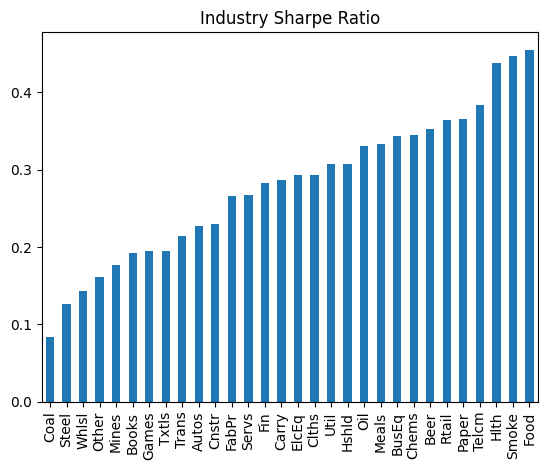

In [16]:
port.sharpe_ratio(ind, 0.03, 12).sort_values().plot.bar(title="Industry Sharpe Ratio")

<Axes: title={'center': 'Industry Sharpe Ratio after 2000'}>

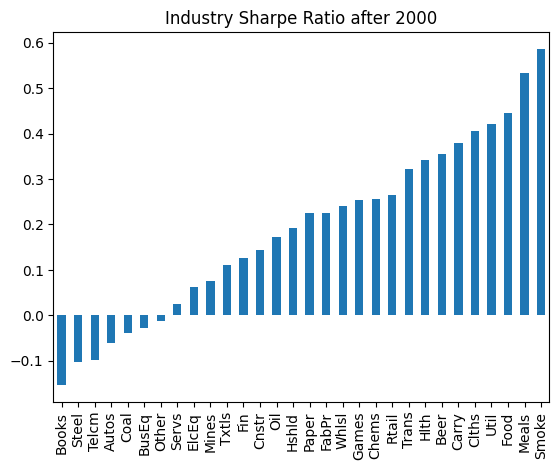

In [19]:
port.sharpe_ratio(ind['2000':], 0.03, 12).sort_values().plot.bar(title="Industry Sharpe Ratio after 2000")

##### Expected Returns and the Covariance Matrix
Generating the efficient frontier requires a set of expected returns and a covariance matrix. For now, let's assume that we can estimate these simply by looking back in time and naively assuming they will hold in the future. Clearly, they will not, but we will have plenty of time to dig into that in the future. For the moment, assume that our naive method of estimating these parameters will suffice.

We can generate an estimate of expected returns using the `annualize_rets()` function, that returns a vector of expected returns. For instance, let's generate the set of expected returns based on historic returns from the 5 year period from 1996 through 2000.

In [24]:
er = port.annualize_rets(ind['1995': '2000'], 12)
er

Food     0.157362
Beer     0.190134
Smoke    0.129288
Games    0.088739
Books    0.200627
Hshld    0.161561
Clths    0.099364
Hlth     0.295218
Chems    0.106504
Txtls   -0.036283
Cnstr    0.118235
Steel    0.115229
FabPr    0.136971
ElcEq    0.291961
Autos    0.094762
Carry    0.237606
Mines   -0.020500
Coal     0.343089
Oil      0.184578
Util     0.172572
Telcm    0.163810
Servs    0.214755
BusEq    0.295745
Paper    0.120336
Trans    0.122916
Whlsl    0.148760
Rtail    0.191885
Meals    0.107844
Fin      0.267598
Other    0.069306
dtype: float64

<Axes: >

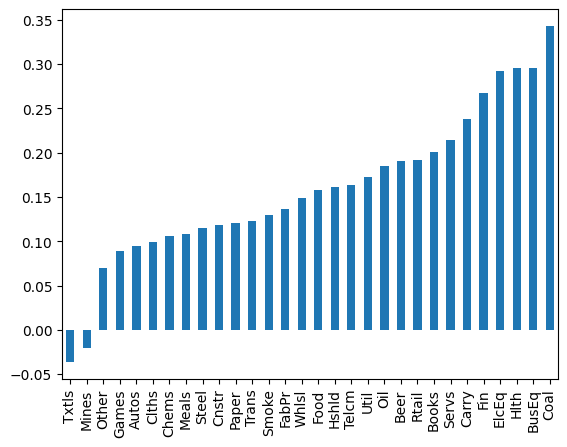

In [26]:
er.sort_values().plot.bar()

In [28]:
cov = ind["1995":"2000"].cov()
cov.shape

(30, 30)

In the next session, we will take the expected returns vector and the covariance matrix we've constructed and start to plot the efficient frontier.